In [1]:
import tensorflow # Import the tensorflow library
from tensorflow import keras # Import the keras module from tensorflow
from tensorflow.keras import Sequential # Import Sequential model
from tensorflow.keras.layers import Dense,Flatten # Import Dense and Flatten layers

# Plot the training and validation loss


c:\Users\subhr\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\subhr\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\subhr\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [2]:
# Load the MNIST dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

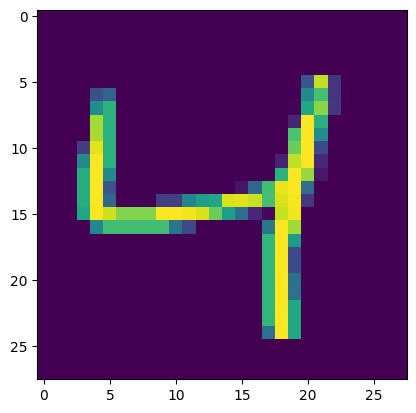

In [5]:

import matplotlib.pyplot as plt # Import matplotlib for plotting
plt.imshow(X_train[2]) # Display the third image in the training data

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:

# Create a Sequential model
model = Sequential()
# Add a Flatten layer to convert the 28x28 image to a 1D array
model.add(Flatten(input_shape=(28,28)))
# Add a Dense layer with 128 neurons and ReLU activation
model.add(Dense(128,activation='relu'))
# Add another Dense layer with 32 neurons and ReLU activation
model.add(Dense(32,activation='relu'))
# Add the output Dense layer with 10 neurons (for 10 classes) and softmax activation
model.add(Dense(10,activation='softmax'))
# Display the model summary
model.summary()
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
# Train the model
history = model.fit(X_train,y_train,epochs=5,validation_split=0.2)
# Make predictions on the test data
y_prob = model.predict(X_test)
# Get the predicted class by finding the index with the highest probability
y_pred = y_prob.argmax(axis=1)
from sklearn.metrics import accuracy_score # Import accuracy_score
# Calculate the accuracy of the model
accuracy_score(y_test,y_pred)

c:\Users\subhr\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9125 - loss: 0.2954 - val_accuracy: 0.9531 - val_loss: 0.1580
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9630 - loss: 0.1226 - val_accuracy: 0.9679 - val_loss: 0.1125
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9750 - loss: 0.0819 - val_accuracy: 0.9662 - val_loss: 0.1149
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9815 - loss: 0.0616 - val_accuracy: 0.9690 - val_loss: 0.1033
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9851 - loss: 0.0466 - val_accuracy: 0.9669 - val_loss: 0.1149
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.968

Text(0, 0.5, 'Loss')

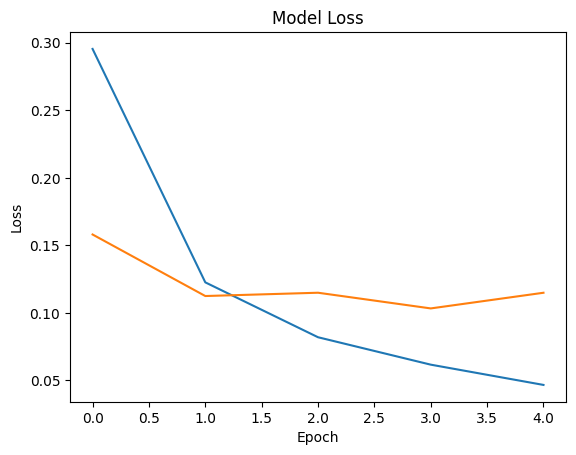

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 


Text(0, 0.5, 'Accuracy')

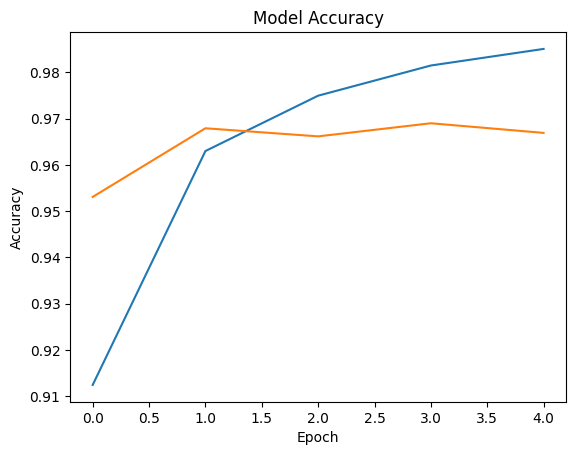

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

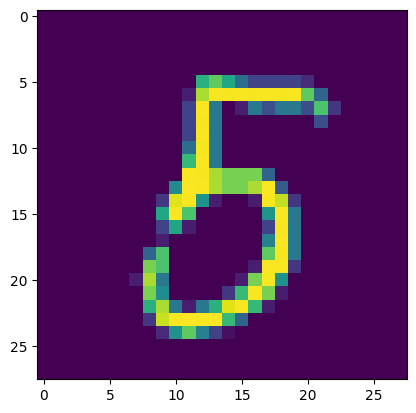

In [29]:
plt.imshow(X_test[45])

In [31]:
model.predict(X_test[899].reshape(1,28,28)).argmax(axis=1)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([8])

In [30]:
model.predict(X_test[45].reshape(1,28,28)).argmax(axis=1)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


array([5])